# **K-Means Clustering for Supply Chain Delay Segmentation**

This notebook presents a full data analytics workflow that applies **K-Means Clustering** to a smart logistics dataset to identify hidden patterns and groupings related to **shipment delays**.

### Objective:
To uncover delay root causes in supply chain operations using unsupervised learning, and to segment logistic operations into meaningful clusters that support decision-making.

### Dataset Summary:
- 1000 records of shipment data
- Key fields: `Waiting_Time`, `Inventory_Level`, `Traffic_Status`, `Temperature`, `Humidity`, `Logistics_Delay`
- Real-world features from IoT-enabled logistics systems


### Techniques Used:
- Data cleaning and preprocessing
- Feature selection and scaling
- K-Means clustering with Elbow & Silhouette methods
- PCA for dimensionality reduction
- Visualizations: Radar Chart, Boxplots, PairPlot
- Final cluster interpretation and business insights


> By the end of this notebook, we identify 3 distinct operational clusters and propose targeted actions for each based on data-driven insights.


In [18]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load Dataset
df = pd.read_csv("smart_logistics.csv")  # Use uploaded file name directly

print("Initial shape:", df.shape)
print("Columns:", df.columns)

# Clean and Select Relevant Features
df_clean = df.dropna(subset=[
    'Waiting_Time', 'Inventory_Level', 'Traffic_Status',
    'Temperature', 'Humidity', 'Logistics_Delay'
])

# Convert categorical features to numerical
df_clean['Traffic_Status'] = df_clean['Traffic_Status'].astype('category').cat.codes
df_clean['Logistics_Delay'] = df_clean['Logistics_Delay'].astype('category').cat.codes

Initial shape: (1000, 16)
Columns: Index(['Timestamp', 'Asset_ID', 'Latitude', 'Longitude', 'Inventory_Level',
       'Shipment_Status', 'Temperature', 'Humidity', 'Traffic_Status',
       'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency',
       'Logistics_Delay_Reason', 'Asset_Utilization', 'Demand_Forecast',
       'Logistics_Delay'],
      dtype='object')


In [3]:
# Prepare features for clustering
features = df_clean[[
    'Waiting_Time', 'Inventory_Level', 'Traffic_Status',
    'Temperature', 'Humidity', 'Logistics_Delay'
]]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

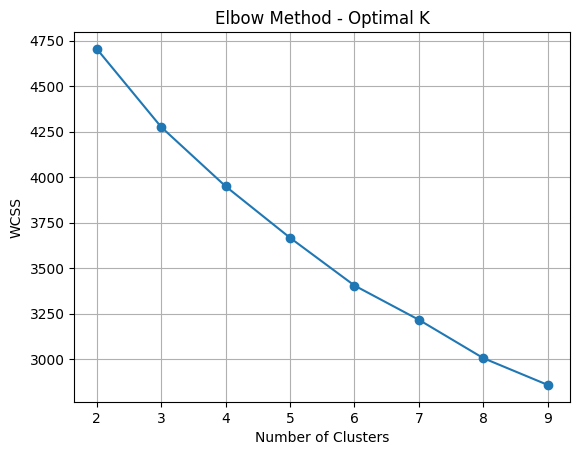

In [4]:
# Elbow Method to determine optimal k
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 10), wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [5]:
# Silhouette Score
print("\nSilhouette Scores:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K = {k}, Silhouette Score = {score:.3f}")

# Fit final K-Means (you can adjust k based on result)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


Silhouette Scores:
K = 2, Silhouette Score = 0.211
K = 3, Silhouette Score = 0.169
K = 4, Silhouette Score = 0.148
K = 5, Silhouette Score = 0.145
K = 6, Silhouette Score = 0.155
K = 7, Silhouette Score = 0.153
K = 8, Silhouette Score = 0.158
K = 9, Silhouette Score = 0.162


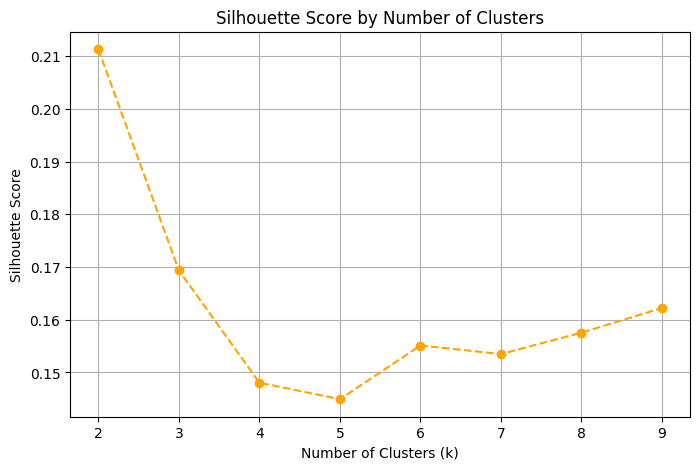

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Score vs k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

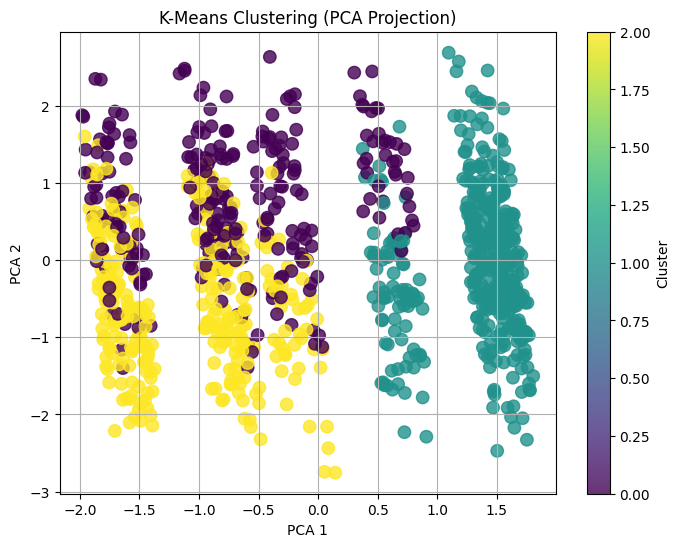

In [6]:
# Add cluster label to DataFrame
df_clean['Cluster'] = clusters

# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=80, alpha=0.8)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [7]:
# Cluster Summary
print("\nCluster-wise summary statistics:")
print(df_clean.groupby('Cluster')[
    ['Waiting_Time', 'Inventory_Level', 'Traffic_Status', 'Temperature', 'Humidity', 'Logistics_Delay']
].mean().round(2))


Cluster-wise summary statistics:
         Waiting_Time  Inventory_Level  Traffic_Status  Temperature  Humidity  \
Cluster                                                                         
0               34.32           184.76            0.49        24.40     63.12   
1               34.36           313.61            1.79        23.73     65.83   
2               36.68           379.37            0.39        23.66     65.73   

         Logistics_Delay  
Cluster                   
0                   0.38  
1                   1.00  
2                   0.15  


In [8]:
df_clean.groupby('Cluster')[
    ['Waiting_Time', 'Inventory_Level', 'Traffic_Status', 'Temperature', 'Humidity', 'Logistics_Delay']
].mean().round(2)

,Waiting_Time,Inventory_Level,Traffic_Status,Temperature,Humidity,Logistics_Delay
Cluster,,,,,,
0,34.32,184.76,0.49,24.40,63.12,0.38
1,34.36,313.61,1.79,23.73,65.83,1.00
2,36.68,379.37,0.39,23.66,65.73,0.15


In [9]:
# Map cluster numbers to labels
cluster_labels = {
    0: "Low-Stock Moderate Delay",
    1: "Traffic-Driven Delays",
    2: "High-Stock Efficient Zone"
}

# Add a column with human-readable labels
df_clean['Cluster_Label'] = df_clean['Cluster'].map(cluster_labels)

In [11]:
import plotly.express as px

# Average features by cluster
cluster_avg = df_clean.groupby('Cluster_Label')[[
    'Waiting_Time', 'Inventory_Level', 'Traffic_Status',
    'Temperature', 'Humidity', 'Logistics_Delay'
]].mean().reset_index()

# Reshape for radar chart
radar_df = pd.melt(cluster_avg, id_vars='Cluster_Label', var_name='Feature', value_name='Value')

# Radar plot
fig = px.line_polar(radar_df, r='Value', theta='Feature', color='Cluster_Label',
                    line_close=True, template='plotly_dark', title="Cluster Profile Radar Chart")
fig.show()

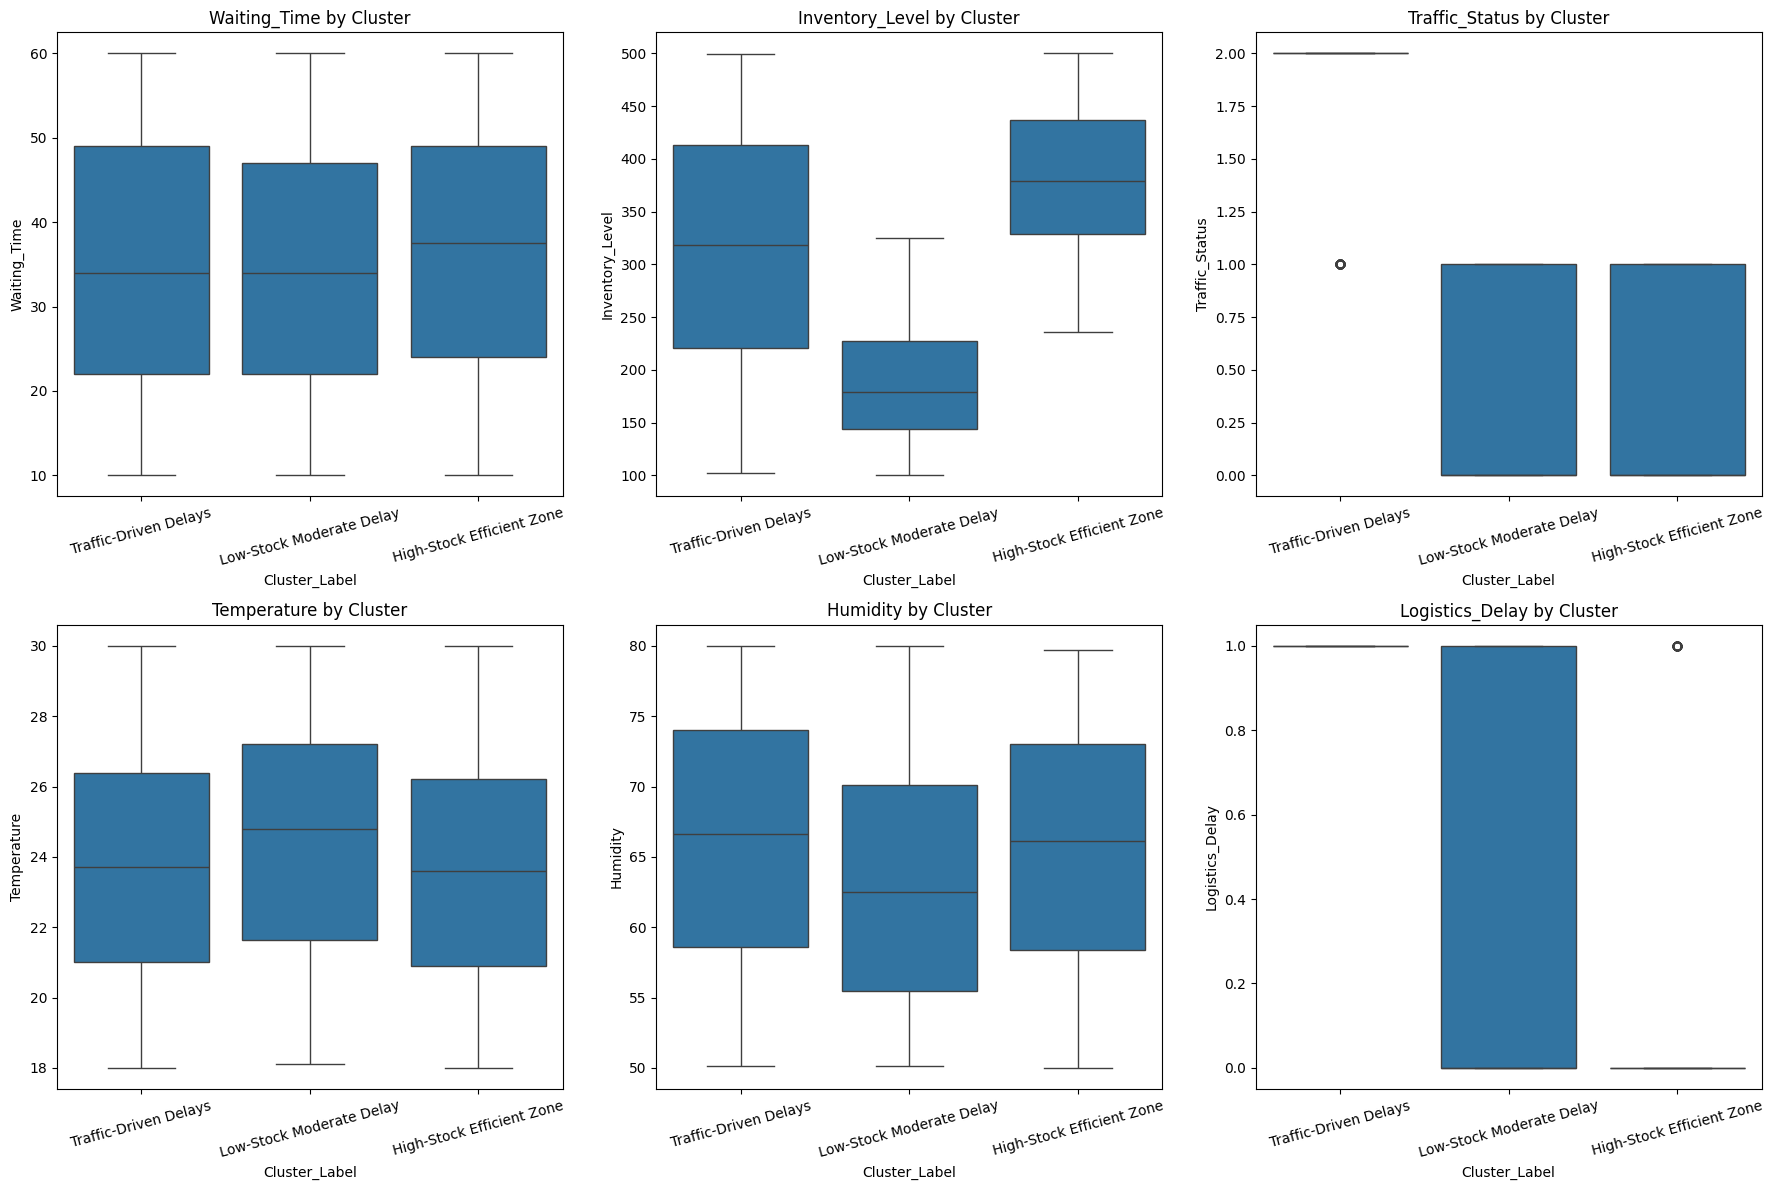

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Waiting_Time', 'Inventory_Level', 'Traffic_Status',
                    'Temperature', 'Humidity', 'Logistics_Delay']

plt.figure(figsize=(18, 12))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster_Label', y=col, data=df_clean)
    plt.title(f"{col} by Cluster")
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [13]:
cluster_counts = df_clean['Cluster_Label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_Label', 'Count']
print(cluster_counts)

               Cluster_Label  Count
0      Traffic-Driven Delays    413
1  High-Stock Efficient Zone    308
2   Low-Stock Moderate Delay    279


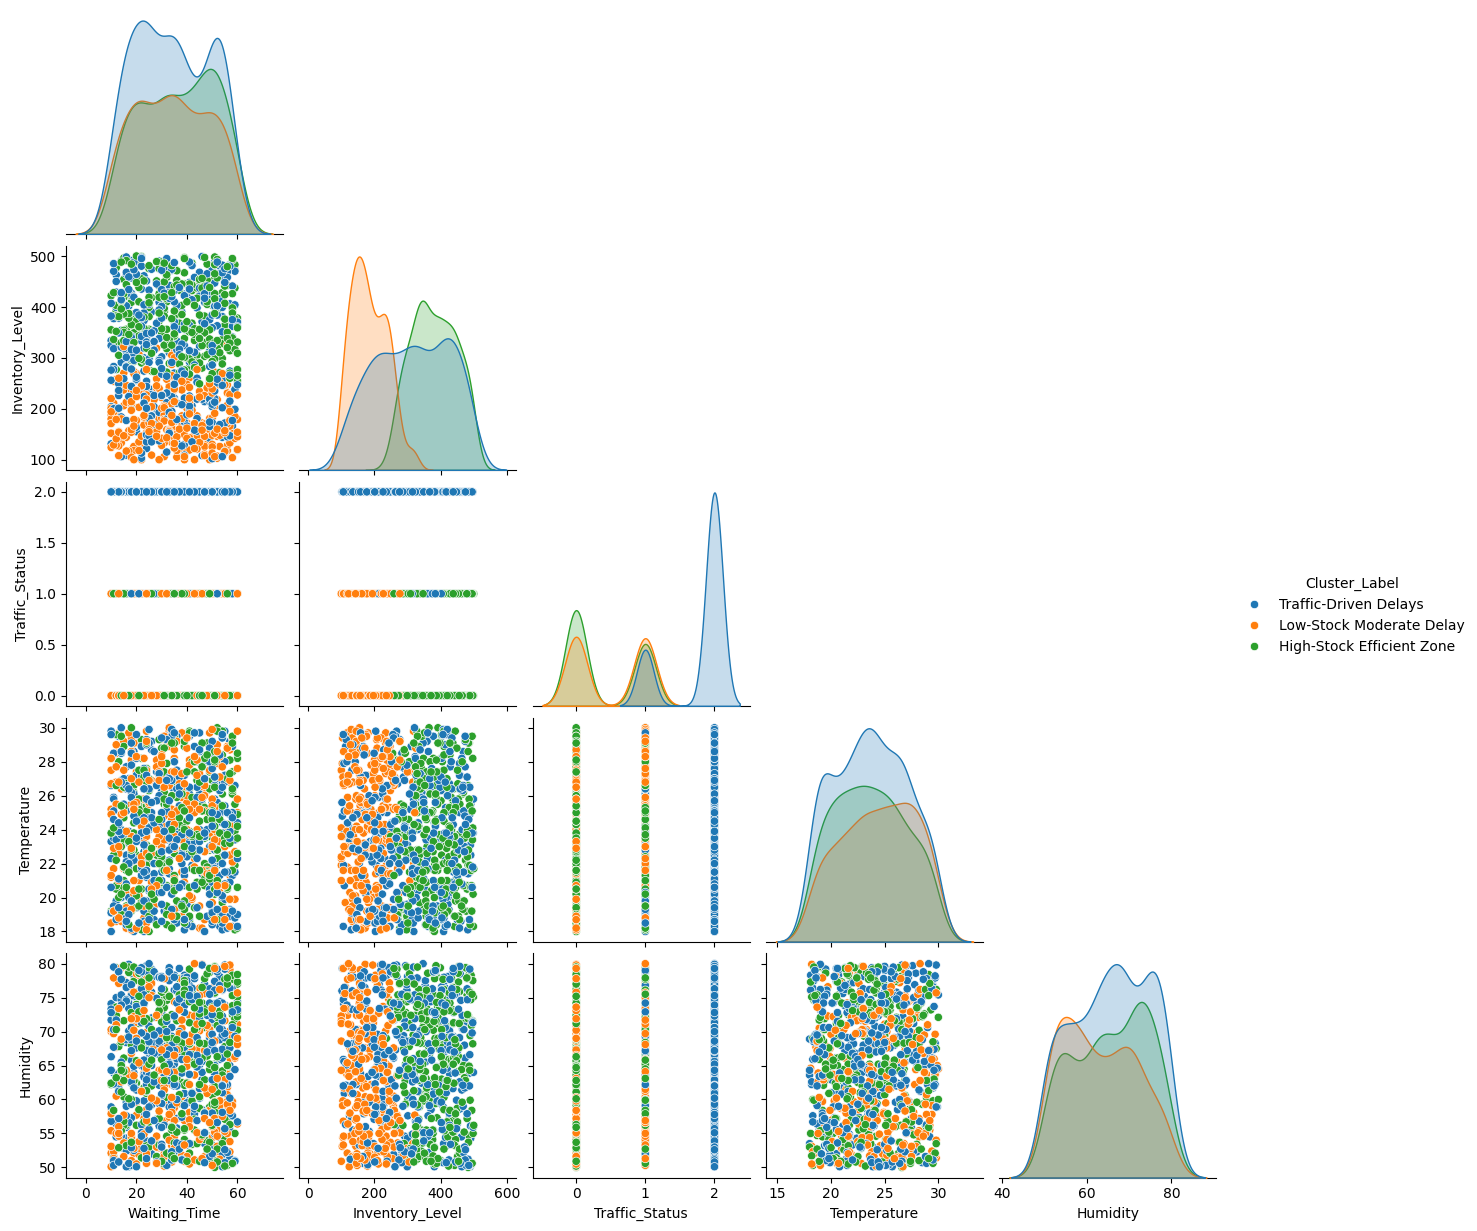

In [14]:
sns.pairplot(df_clean[[
    'Waiting_Time', 'Inventory_Level', 'Traffic_Status',
    'Temperature', 'Humidity', 'Cluster_Label'
]], hue='Cluster_Label', corner=True)
plt.show()

In [17]:
from IPython.display import Markdown, display
display(Markdown(summary))


### 🧠 Final Cluster Insight Summary

| Cluster Label              | Key Traits                                                  | Suggested Action                         |
|---------------------------|-------------------------------------------------------------|-------------------------------------------|
| **Low-Stock Moderate Delay**  | Low inventory, average waiting, low traffic, mid delay        | Increase buffer stock in low-access zones |
| **Traffic-Driven Delays**     | High traffic, 100% delay, mid inventory, medium humidity      | Optimize routing, shift delivery windows  |
| **High-Stock Efficient Zone** | Highest inventory, lowest delay, low traffic, long waiting    | Benchmark this zone; maintain current SOP |



In [ ]:
# Save to Excel
df_clean.to_csv("clustered_smart_logistics.csv", index=False)

# Download in Colab
from google.colab import files
files.download("clustered_smart_logistics.csv")